# Numerical Integration:  Trapezoidal Rule
---
## In mathematics, and more specifically in numerical analysis, the trapezoidal rule is a technique for approximating the definite integral.

<img src="https://www.emathhelp.net/images/calc/322_trapezoidal_rule.png" width=350>

---

### The definite integral of $f(x)$ is equal to the (net) area under the curve $y = f(x)$ over the interval $[a,\,b]$.
### Riemann sums approximate definite integrals by using sums of rectangles to approximate the area.

### The trapezoid rule gives a better approximation of a definite integral by summing the areas of the trapezoids connecting the points
### $$(x_{i}, 0),\,(x_{i+1},0),\,(x_{i},f(x_{i})),\,(x_{i+1},f(x_{i+1}))$$
### for each sub-interval $[x_{i},\,x_{i+1}]$ of a partition.

### Note that the area of each trapezoid is
### $$(x_{i+1} - x_{i}) f(x_{i}) + \frac{1}{2} (x_{i+1} - x_{i})(f(x_{i+1}) - f(x_{i})) = \frac{1}{2}(f(x_{i+1}) + f(x_{i}))(x_{i+1} - x_{i})$$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Integration_num_trapezes_notation.svg/2000px-Integration_num_trapezes_notation.svg.png" width=350>


---
## Formula

### For a partitition $x_0 = a < x_1 < \cdots < x_n = b$, the trapezoid rule formula simplifies to
### $$\int_a^b\,f(x)\,dx \approx \frac{1}{2} \sum_{i=1}^n (f(x_i) + f(x_{i-1})) (x_i - x_{i-1})$$

### In particular, given an integer $N$, the trapezoid rule for $N$ sub-intervals of $[a,\,b]$ of equal length is
### $$T_N(f) = \frac{\Delta x}{2} \sum_{i = 1}^N (f(x_i) + f(x_{i-1}))$$
### where $\Delta x = \frac{b - a}{N}$ is the length of the sub-intervals and $x_i = a + i\,\Delta x$.

### Notice that the trapezoid is the average of the left and right Riemann sums
### $$\begin{aligned} T_N(f) &= \frac{\Delta x}{2} \sum_{i = 1}^N (f(x_i) + f(x_{i-1}))\\&= \frac{1}{2} \left( \sum_{i=1}^N\,f(x_i)\,\Delta x + \sum_{i=1}^N\,f(x_{i-1})\,\Delta x \right)\end{aligned}$$

---
## Prerequisites

### 1. The integrand function $f(x)$.
### 2. The interval $[a,\,b]$.
### 3. The positive integer $N$ where $N$ is a number of sub-intervals of  $[a,\,b]$.

---
## Implementation

### Part 0. Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Part 1. Implement trapezoidal rule

In [2]:
def trapzoidal(
    f,
    a,
    b,
    N=50
):
    
    '''
    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of sub-intervals of [a,b]

    Returns
    -------
    T : float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.
    '''
    
    # Compute the equivalent points
    x = np.linspace(a, b, N+1)
    
    # Compute the value of f(x)
    y = f(x)
    
    # Right endpoints
    y_right = y[1:]
    
    # Left endpoints
    y_left = y[:-1]
    
    # Compute the length of each sub-interval
    dx = (b - a) / N
    
    # Compute the integal
    T = (dx/2) * np.sum(y_right + y_left)
    
    return T

---
## Example

### 1. Compute the integral
### $$\int_0^{\pi/2}\,\sin x\,dx$$

### Note that we already know the real answer is $1$.

In [3]:
def sin(x):
    return np.sin(x)

### Plot the function

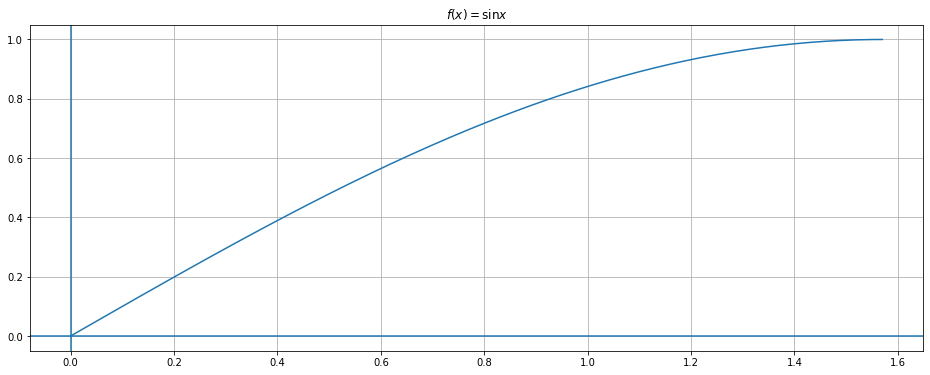

In [4]:
x_range = np.arange(0, np.pi/2, 0.01)
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(x_range, sin(x_range))
ax.set_title(r'$f(x)=\sin x$')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### Get the approximate value and error

In [5]:
approximation = trapzoidal(np.sin,0,np.pi/2,1000)
print('The approximate value by trapzoidal rule is', approximation)
print('The error is', abs(1 - approximation))

The approximate value by trapzoidal rule is 0.9999997943832332
The error is 2.056167668351705e-07


---
## Error Estimate

### When computing integrals numerically, it is essential to know how good our approximations are. Notice in the theorem below that the error formula is inversely proportional to $N^2$.
### This means that the error descreases much faster with larger $N$ compared to Riemann sums.

---
## Theorem

### Let $T_N(f)$ denote the trapezoid rule
### $$T_N(f) = \frac{\Delta x}{2}\,\sum_{i=1}^N(f(x_i) + f(x_{i-1}))$$
### where $\Delta x = \frac{(b - a)}{N}$ and $x_i = a + i\,\Delta x$.

### The <span style="color:red"> _error bound_ </span> is
### $$E_N^T(f) = \left| \int_a^b\,f(x)\,dx - T_N(f) \right| \leq \frac{(b - a)^3}{12N^2}\,K_2$$
### where $|f''(x)| \leq K_2$ for all $x \in [a,\,b]$.

#### More detail for the proof of this theorem: [link](https://en.wikipedia.org/wiki/Trapezoidal_rule)

---
## Example

## 1. Approximate $\ln 2$

### find a value $N$ which guarantees that the trapezoid rule approximation $T_N(f)$ of the integral
### $$\int_1^2\,\frac{1}{x}\,dx = \ln 2$$
### satisfies $E_N^T(f) \leq 10^{-8}$.

### For $f(x) = \frac{1}{x}$, we compute $f''(x) = \frac{2}{x^3} \leq 2$ for all $x \in [1,\,2]$ therefore the error formula implies
### $$\left| \int_1^2 \frac{1}{x}\,dx - T_N(f) \right| \leq \frac{2}{12N^2}$$

### Then $E_N^T \leq 10^{-8}$ is guaranteed if $\frac{1}{6N^2} \leq 10^{-8}$ which implies
### $$\frac{10^4}{\sqrt{6}} \leq N$$

In [6]:
## Compute the inequality
print(10**4/np.sqrt(6),'< N')

4082.4829046386303 < N


### So we need $4083$ subintervals to guarantee $E_N^T(f) \leq 10^{-8}$.
### Compute the approximation using our own implementation of the trapezoid rule:

In [7]:
approximation = trapzoidal(lambda x : 1/x, 1, 2, 4083)
print('The approximate value is', approximation)

The approximate value is 0.6931471843089954


### Let's verify that this is within $10^{-8}$

In [8]:
error = abs(approximation - np.log(2))
print('The error is', error)
print('Answer is', error < 10**(-8))

The error is 3.7490500703896146e-09
Answer is True


### However, a natural question arises: what is the actual smallest $N$ such that the trapezoid rule gives the estimate of $\ln 2$ to within $10^{-8}$?

In [9]:
for n in range(1, 4083):
    approximation = trapzoidal(lambda x : 1/x, 1, 2, n)
    if abs(approximation - np.log(2)) < 10e-8:
        print("Accuracy achieved at N =", n)
        break

Accuracy achieved at N = 791


## End